In [2]:
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler


In [3]:
df = pd.read_csv('datasets/us_accidents_expanded.csv')

## Data Analysis

### Feature Distribution
We would like to analyze distributions for some of the features to get a general
idea of our classes.

#### Target Feature

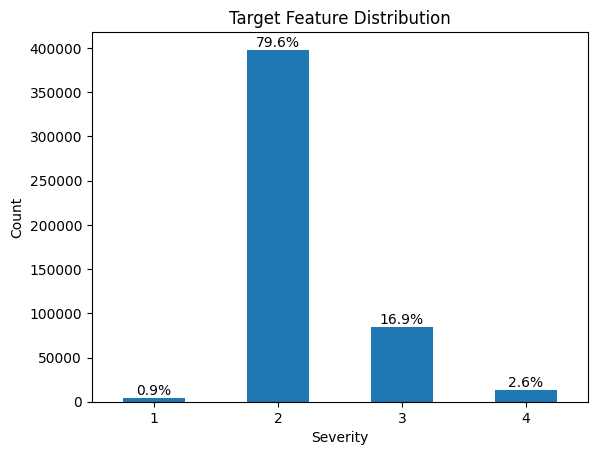

In [7]:
severity_counts = df['Severity'].value_counts().sort_index()
severity_percentage = severity_counts / df.shape[0] * 100

ax = severity_counts.plot(kind='bar')
for i, count in enumerate(severity_counts):
    ax.text(i, count + 5, f'{severity_percentage[i + 1]:.1f}%', ha='center', va='bottom')

plt.title('Target Feature Distribution')
plt.xlabel('Severity')
plt.xticks(rotation=0)
plt.ylabel('Count');

Clearly there is an imbalance in the distribution for severity levels, with the vast majority of records being level `2`. We will need to keep that in mind when
we're training our ML models.

### Correlations
We can take a look at how each feature correlates with our target variable `Severity`.
To help with performance, we'll be splitting our features into several batches
and throw up a correlation matrix for each category.

#### 

In [8]:
df_corr = df.copy()

# drop timestamps
df_corr = df_corr.drop(columns=['Start_Datetime', 'End_Datetime', 'Weather_Timestamp', 'Start_Date', 'End_Date', 'Start_Time', 'End_Time'])
# todo, encode time numerically

# drop address information and description
df_corr = df_corr.drop(columns=['Description', 'Street', 'City', 'County', 'Zipcode'])

# one-hot encode airport code
df_corr = pd.get_dummies(df_corr, columns=['Airport_Code'])

# change day/night to true/false respectively
day_night = ['Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight', 'Astronomical_Twilight']
df_corr[day_night] = df_corr[day_night].replace('Day', True)
df_corr[day_night] = df_corr[day_night].replace('Night', False)

# normalize numerical features
scaler = MinMaxScaler()
numeric_columns = df_corr.select_dtypes(include=['number']).columns
df_corr[numeric_columns] = scaler.fit_transform(df_corr[numeric_columns])

df_corr.head()

,Severity,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),...,Airport_Code_KY23,Airport_Code_KY50,Airport_Code_KY51,Airport_Code_KY63,Airport_Code_KY70,Airport_Code_KYIP,Airport_Code_KYKM,Airport_Code_KYNG,Airport_Code_KZPH,Airport_Code_KZZV
0,0.333333,0.248761,0.584845,0.248768,0.584845,0.000000,0.543539,0.543539,0.616162,0.777662,...,False,False,False,False,False,False,False,False,False,False
1,0.333333,0.590423,0.826094,0.590418,0.826108,0.000289,0.431180,0.424157,0.474747,0.777401,...,False,False,False,False,False,False,False,False,False,False
2,0.333333,0.413262,0.070240,0.413273,0.070246,0.000114,0.511938,0.511938,0.727273,0.774269,...,False,False,False,False,False,False,False,False,False,False
3,0.333333,0.782343,0.552575,0.782364,0.552945,0.005448,0.367978,0.325843,0.858586,0.740344,...,False,False,False,False,False,False,False,False,False,False
4,0.333333,0.443310,0.096683,0.443322,0.096669,0.000238,0.420646,0.420646,0.333333,0.773747,...,False,False,False,False,False,False,False,False,False,False


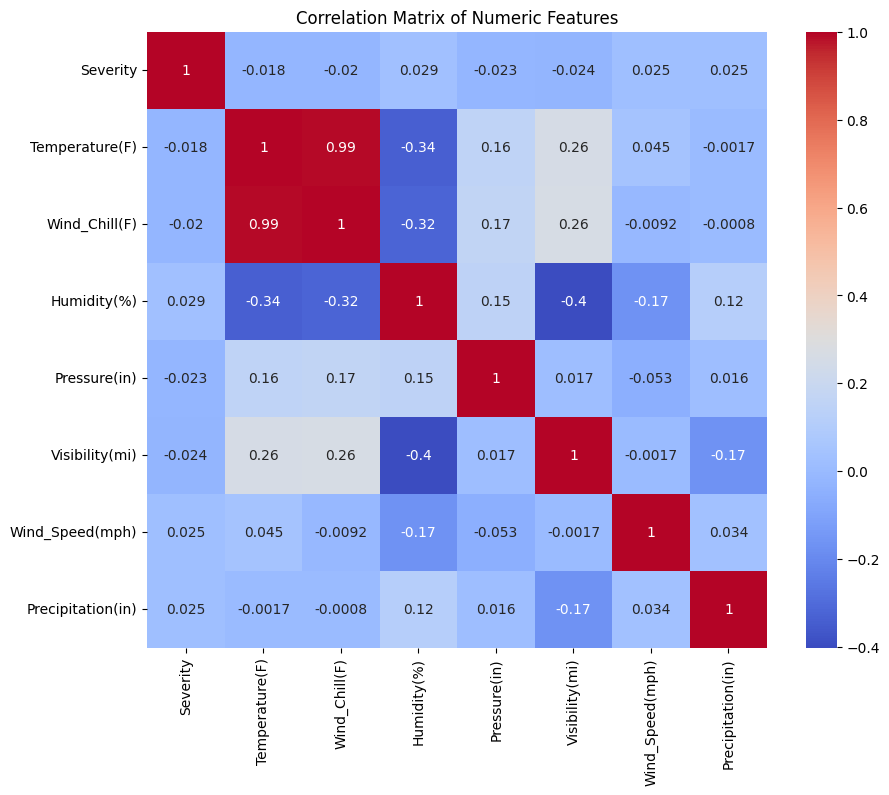

In [14]:
df_corr_weather = df_corr[[
    'Severity',
    'Temperature(F)',
    'Wind_Chill(F)',
    'Humidity(%)',
    'Pressure(in)',
    'Visibility(mi)',
    'Wind_Speed(mph)',
    'Precipitation(in)'
]]

weather_corr = df_corr_weather.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(weather_corr, annot=True, cmap='coolwarm')
plt.title("Correlation Matrix of Numeric Features")
plt.show()


In [ ]:
df_corr_weather = df_corr[[
    'Severity',
    'Temperature(F)',
    'Wind_Chill(F)',
    'Humidity(%)',
    'Pressure(in)',
    'Visibility(mi)',
    'Wind_Speed(mph)',
    'Precipitation(in)'
]]

weather_corr = df_corr_weather.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(weather_corr, annot=True, cmap='coolwarm')
plt.title("Correlation Matrix of Numeric Features")
plt.show()
